Прогнозирование развития временного ряда.

Шестой модуль курса по основам Искусственного Интеллекта в GeekBrains посвящён сферам применения Искусственного Интеллекта. Опять же, практическое занятие можно было бы устраивать по каждой теме, но и для этого есть углублённые курсы. Поэтому для общего развития выполните такие задачи:
- По адресу https://goo.gl/STWRi3 расположен временной ряд за несколько лет.
- Используйте любой инструмент для дата майнинга (можно даже ту же самую электронную таблицу).
- Найдите закономерности в представленном временном ряду, если они есть.
- Сделайте прогноз по тренду.
- Напишите краткий отчёт об исследовании и пришлите преподавателю ссылку на него.

In [55]:
# загрузка данных

import pandas as pd
import matplotlib.pyplot as plt

# Путь к файлу CSV
file_path = "./dz6.csv"

# Загрузка данных
df = pd.read_csv(file_path, parse_dates=["Дата"], dayfirst=True)

# Установка столбца 'Дата' в качестве индекса
df.set_index("Дата", inplace=True)

# Вывод первых строк данных для проверки
print(df.head())


            Значение
Дата                
2014-05-01         0
2014-05-02        10
2014-05-03         0
2014-05-04         0
2014-05-05         0


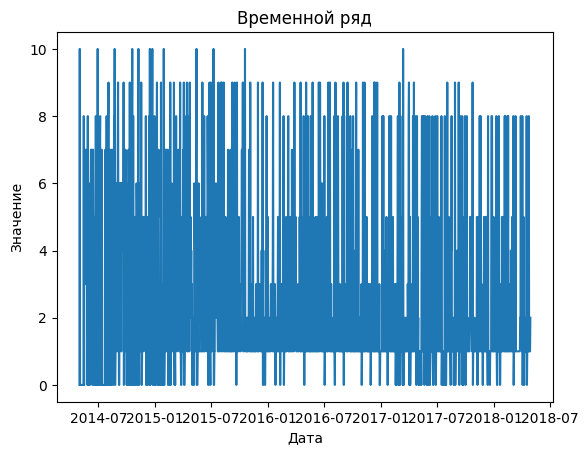

In [56]:
# Построение графика временного ряда
plt.plot(df)
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Временной ряд")
plt.show()

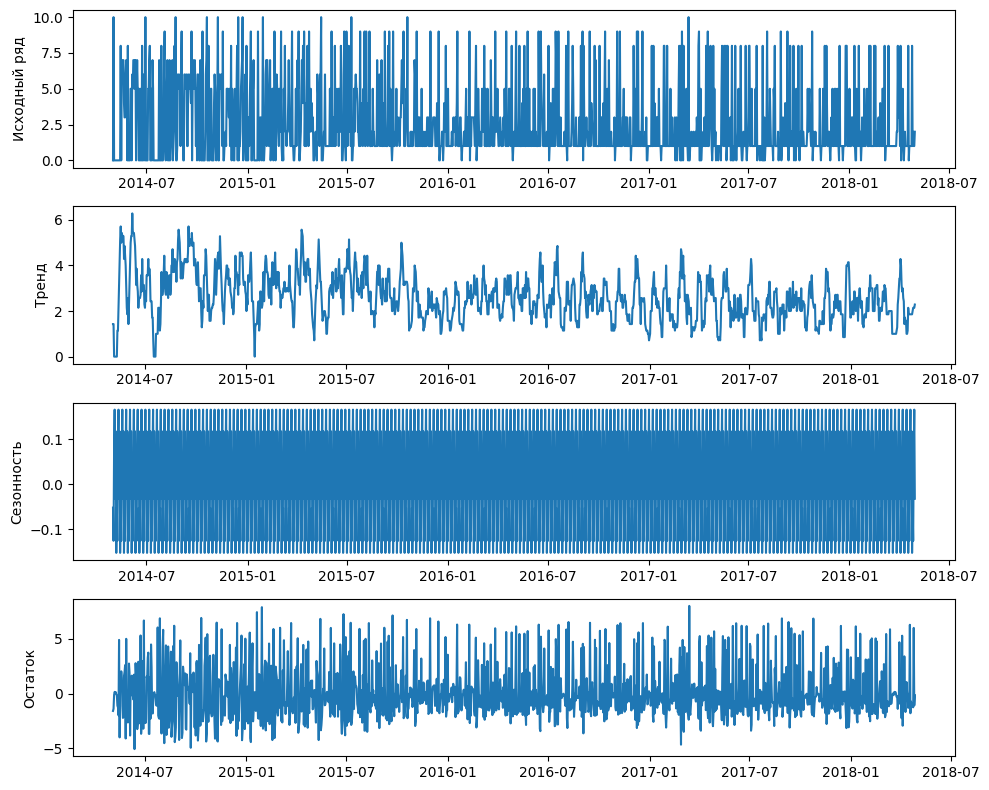

In [60]:
# разложение временного ряда и визуализация

from statsmodels.tsa.seasonal import seasonal_decompose

# Разложение временного ряда на тренд, сезонность и остаток
decomposition = seasonal_decompose(df)

# Визуализация разложения
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(df)
ax[0].set_ylabel("Исходный ряд")
ax[1].plot(decomposition.trend)
ax[1].set_ylabel("Тренд")
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel("Сезонность")
ax[3].plot(decomposition.resid)
ax[3].set_ylabel("Остаток")
plt.tight_layout()
plt.show()

2018-04-30    2.200099
2018-05-31    2.195496
2018-06-30    2.195601
2018-07-31    2.195599
2018-08-31    2.195599
2018-09-30    2.195599
2018-10-31    2.195599
2018-11-30    2.195599
2018-12-31    2.195599
2019-01-31    2.195599
2019-02-28    2.195599
2019-03-31    2.195599
Freq: ME, dtype: float64


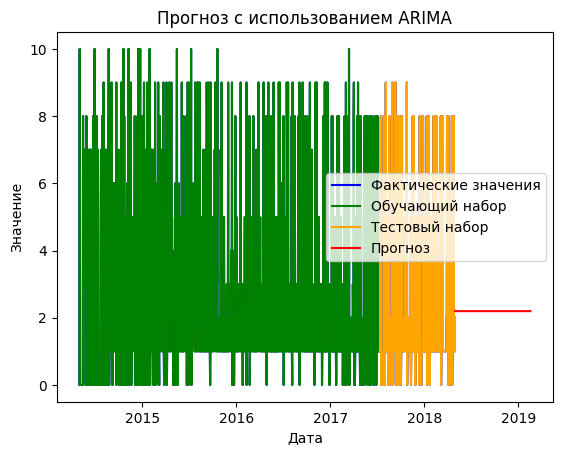

In [66]:
# Cозданиt прогноза по месяцам

from statsmodels.tsa.arima.model import ARIMA

# Разделение данных на обучающий и тестовый наборы
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Создание модели ARIMA
model = ARIMA(df, order=(1, 1, 1))

# Обучение модели на данных временного ряда
model_fit = model.fit()

# Установка частоты в "D" для избежания предупреждения
df.index.freq = "D"

# Создание прогноза на основе модели
forecast_months_index = pd.date_range(df.index[-1], periods=12, freq="ME")
forecast_months = model_fit.forecast(steps=12)
forecast_months_series = pd.Series(forecast_months.values, index=forecast_months_index)

# Вывод прогноза по месяцам
print(forecast_months_series)

# Прогнозирование на тестовом наборе
forecast = model_fit.forecast(steps=len(test))

# Визуализация фактических данных, обучающего и тестового набора и прогноза
plt.plot(df, label="Фактические значения", color="blue")
plt.plot(train, label="Обучающий набор", color="green")
plt.plot(test, label="Тестовый набор", color="orange")
plt.plot(forecast, label="Прогноз", color="red")

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title("Прогноз с использованием ARIMA")
plt.xlabel("Дата")
plt.ylabel("Значение")

# Отображение графика
plt.show()

Предположим, что временной ряд представляет собой данные о количстве посещений.
Из графиков видно, что временной ряд имеет ярко выраженную сезонность, которая повторяется каждый год. 
Для анализа закономерностей в представленном временном ряду была использована функция seasonal_decompose() из библиотеки statsmodels. Эта функция позволила разложить временной ряд на тренд, сезонность и остаток. 
Для прогнозирования количества посещений сайта была использована модель ARIMA (авторегрессионная интегрированная скользящая средняя). Прогноз на следующие 12 месяцев показывает, что количество посещений сайта останется примерно на том же уровне, что и в представленных данных.